In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp 'drive/MyDrive/Colab Notebooks/Basic-principles-nn-pythorch/plot_functin.py' .

<div dir="rtl" lang="he" xml:lang="he">

#  מודלים ושכבות 
מודלים, שהם צירוף של כמה שכבות מהווים את הפונקציות אותם אנחנו רוצים לשפר. 

כאשר נרצה לפתח מוצר שמשתמש בבינה מלאכותית, ניצור מודל - שזה הפונקציה שתהיה המוצר הסופי, וסביב המודל כלים שיעזרו לנו לשפר את המודל.

<div dir="rtl" lang="he" xml:lang="he">


## יצירת מודל
מודל הוא שירשור של פונקציות, מורכבות ככול שיהיו, כל שיכבה היא בעצמה מודל?


<div dir="rtl" lang="he" xml:lang="he">


## יצירת מודל
מודל הוא שירשור של פונקציות, מורכבות ככול שיהיו, כל שיכבה היא בעצמה מודל?


In [10]:
import torch
import matplotlib.pyplot as plt
from plot_functin import plot_3d_model

<div dir="rtl" lang="he" xml:lang="he">


## יצירת מודל
מודל הוא שירשור של פונקציות, מורכבות ככול שיהיו, כל שיכבה היא בעצמה מודל?


In [11]:
import torch
conv_1 = torch.nn.Conv2d(1, 6, 5)
conv_2 = torch.nn.Conv2d(6, 16, 5)
max_pool_1 = torch.nn.MaxPool2d(2)
max_pool_2 = torch.nn.MaxPool2d(2)
linear_1 = torch.nn.Linear(16*5*5,120)
linear_2 = torch.nn.Linear(120,84)
linear_3 = torch.nn.Linear(84,10)
activate_1 = torch.nn.ReLU()
activate_2 = torch.nn.ReLU()

def model(input_data):
    y = max_pool_1(input_data)
    y = conv_1(y)
    y = max_pool_2(y)
    y = conv_2(y)
    y = linear_1(y)
    y = activate_1(y)
    y = linear_2(y)
    y = activate_2(y)
    y = linear_3(y)
    return y

In [12]:
x = torch.rand((100,400,120))

<div dir="rtl" lang="he" xml:lang="he">

### שכבה ליניארית
שיכבה ליניארית היא פונקציה אפינית 

$$
\\ \text{Lin}:ℝ^i\to ℝ^o
\\ \text{Lin}(x) = Wx+b
$$


ע"מ שהשכבה תיהיה מוגדרת גם על אוסף של וקטורים , כותבים אותה מעט שונה 
$$
\\ \text{Lin}:(ℝ^i)^n\to (ℝ^o)^n
\\ \text{Lin}(x) = xW.T+b  
$$


In [13]:
lin_layer = torch.nn.Linear(2,2)

x = torch.rand(10,2)
print(
    f"""
{x=},
{lin_layer(x)=}
"""
)


x=tensor([[2.4167e-01, 8.3183e-01],
        [8.8765e-01, 6.7941e-01],
        [9.2864e-01, 8.4954e-01],
        [1.5056e-01, 7.9045e-01],
        [8.4507e-01, 2.7270e-01],
        [3.7656e-01, 7.9501e-01],
        [6.5820e-01, 3.8104e-02],
        [8.7430e-01, 3.9475e-01],
        [6.7145e-04, 8.2030e-01],
        [3.3250e-01, 3.5043e-01]]),
lin_layer(x)=tensor([[ 0.5036,  0.1848],
        [ 0.6735,  0.0852],
        [ 0.7976,  0.1535],
        [ 0.4400,  0.1727],
        [ 0.3996, -0.0813],
        [ 0.5360,  0.1619],
        [ 0.1748, -0.1681],
        [ 0.4886, -0.0322],
        [ 0.3971,  0.1935],
        [ 0.2376, -0.0202]], grad_fn=<AddmmBackward0>)



In [14]:
W = lin_layer.weight.data
b = lin_layer.bias.data
print(
    f"""
{x=},
{W=},
{b=},
{x@W.T+b=},
"""
)


x=tensor([[2.4167e-01, 8.3183e-01],
        [8.8765e-01, 6.7941e-01],
        [9.2864e-01, 8.4954e-01],
        [1.5056e-01, 7.9045e-01],
        [8.4507e-01, 2.7270e-01],
        [3.7656e-01, 7.9501e-01],
        [6.5820e-01, 3.8104e-02],
        [8.7430e-01, 3.9475e-01],
        [6.7145e-04, 8.2030e-01],
        [3.3250e-01, 3.5043e-01]]),
W=tensor([[ 0.4117,  0.6303],
        [-0.0563,  0.4151]]),
b=tensor([-0.1202, -0.1469]),
x@W.T+b=tensor([[ 0.5036,  0.1848],
        [ 0.6735,  0.0852],
        [ 0.7976,  0.1535],
        [ 0.4400,  0.1727],
        [ 0.3996, -0.0813],
        [ 0.5360,  0.1619],
        [ 0.1748, -0.1681],
        [ 0.4886, -0.0322],
        [ 0.3971,  0.1935],
        [ 0.2376, -0.0202]]),



<div dir="rtl" lang="he" xml:lang="he">
אפשר לראות כל שיכבה ליניארית כתת מרחב אפיני. 
ב
$R$
זה יראה ככה:

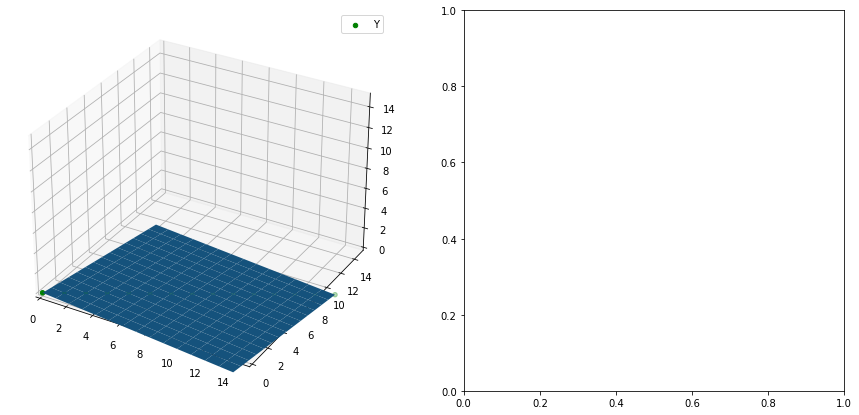

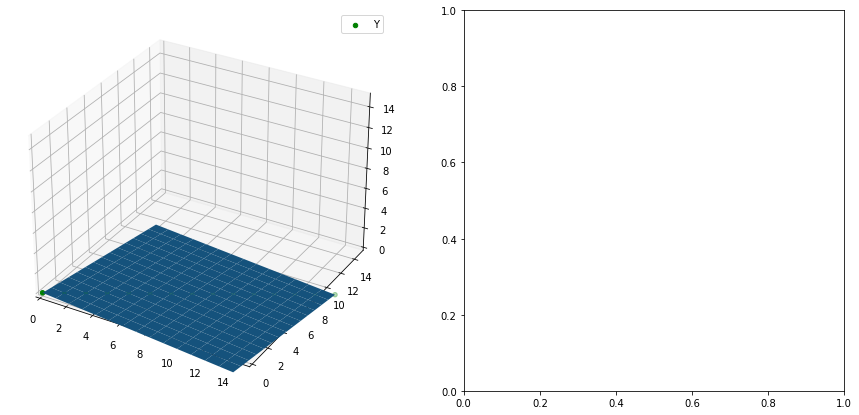

In [15]:
lin_layer = torch.nn.Linear(2,1)
cordinnet = [[num,num] for num in range(15)]
x = torch.tensor(cordinnet, dtype=torch.float32)
y = lin_layer(x).detach()
plot_3d_model(lin_layer,x,y)

<div dir="rtl" lang="he" xml:lang="he">

### שיכבת אקטיבציה


<div dir="rtl" lang="he" xml:lang="he">

### שיכבת הטמעה?

<div dir="rtl" lang="he" xml:lang="he">

### שיכבת קונבולוציה

<div dir="rtl" lang="he" xml:lang="he">

## הרכבת שכבות

<div dir="rtl" lang="he" xml:lang="he">

### הרכבת שכבות לזיהוי תמונה

<div dir="rtl" lang="he" xml:lang="he">

### הרכבת שכבות לעוד תפקיד?

<div dir="rtl" lang="he" xml:lang="he">

## יצירת מודל דרך ירושה מ`nn.models`

<div dir="rtl" lang="he" xml:lang="he">

##

<div dir="rtl" lang="he" xml:lang="he">
